In [113]:
import pandas as pd
import numpy as np

In [114]:
data = pd.read_csv('Credit Card Customer Data.csv')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [115]:
data.shape

(660, 7)

In [116]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [117]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [118]:
## Drop these two columns Customer Key andAvg_Credit_limit
data_new = data.drop(columns=['Sl_No'], axis=1)
data_new.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [119]:
X = np.array(data_new)
print(X.shape)

(660, 6)


In [120]:
X[0]

array([ 87073, 100000,      2,      1,      1,      0])

In [121]:
X[0].shape

(6,)

In [122]:
## Normalize each columns

def Normalize(X):
    m, n = X.shape
    mu = np.zeros((n,))
    var = np.zeros((n,))

    for i in range(m):
        mu += X[i]
    mu /= m

    for i in range(m):
        var += (X[i] - mu)**2
    var /= m

    mu = mu.reshape(1, -1)
    var = var.reshape(1, -1)
    X = (X - mu)/(np.sqrt(var))
    return X

In [123]:
X_new = Normalize(X)
print(X_new.shape)
print(X_new)

(660, 6)
[[ 1.24691971  1.74018685 -1.24922476 -0.86045063 -0.54748969 -1.25153737]
 [-0.65320273  0.41029254 -0.78758515 -1.47373077  2.5205186   1.89185881]
 [-1.47609839  0.41029254  1.05897329 -0.86045063  0.13428993  0.1455276 ]
 ...
 [-0.05105538  2.93709172  1.5206129  -0.86045063  2.17962879 -0.90227113]
 [ 0.99629832  3.65523464  2.44389211 -0.86045063  4.22496765 -1.25153737]
 [ 0.97657819  3.52224521  1.9822525  -1.47373077  3.20229822 -0.55300488]]


In [124]:
def find_nearest_centers(X, centroids):
    m, n = X.shape
    m_c, n_c = centroids.shape

    cost = 0
    idx = np.zeros(m, dtype=int)
    for i in range(m):
        norm_min = np.inf
        for j in range(m_c):
            norm = np.linalg.norm(X[i] - centroids[j])
            if norm < norm_min:
                norm_min = norm
                idx[i] = j
        cost += norm_min

    return idx, cost

In [125]:
## Lets randomly select k centers let say 10 centers

def random_centroids(X, k):
    m, n = X.shape
    randindex = np.random.permutation(X.shape[0])
    centroids = X[randindex[:k]]
    return centroids


In [126]:
def compute_new_positions(X_new, centroids, idx):
    m, n = X_new.shape
    m_c, n_c = centroids.shape

    for i in range(m_c):
        mu_c = np.zeros((n,))
        count = 0
        for j in range(m):
            if idx[j] == i:
                count += 1
                mu_c += X_new[j]
        if count > 0:
            mu_c /= count
            centroids[i] = mu_c
    
    return centroids

In [151]:
def KMeans2(X_new, k):
    centroids = random_centroids(X_new, k)
    cost = 0
    for i in range(10):
        idx, cost = find_nearest_centers(X_new, centroids)
        centroids_new = compute_new_positions(X_new, centroids, idx)
        centroids = centroids_new

    return cost, centroids
    

In [135]:
k = []
cost =[]

In [136]:
for i in range(25):
    k.append(i+1)
    cst, centroids = KMeans(X_new, i+1)
    cost.append(cst)

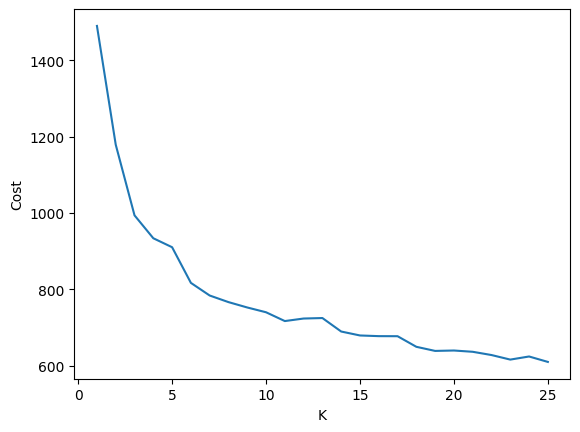

In [137]:
import matplotlib.pyplot as plt

plt.plot(k, cost)
plt.xlabel('K')
plt.ylabel('Cost')
plt.show()

Optimal value of K that should be taken is between 3 and 5

In [159]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=42)
silhouette_score(X_new, kmeans.fit_predict(X_new))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.41774348523773736

In [163]:
## Silhoutte score of K = 4 is very high optimal K = 4

In [162]:
kmeans.fit_predict(X_new)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Linear Regression

In [76]:
data = pd.read_csv('Credit Card Customer Data.csv')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [77]:
data.shape

(660, 7)

In [78]:
## Checking for any missing values
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [79]:
len(data['Sl_No'].value_counts())

## if length is 660 then no same Sl_No
## we can remove this column

660

In [80]:
data['Customer Key'].value_counts()

## some customers are having same key

Customer Key
97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: count, Length: 655, dtype: int64

In [81]:
## Normalizing the columns
def normalize(column):
    mean = np.mean(column)
    std = np.std(column)
    print(mean, std)
    column = (column - mean)/std
    return column

In [82]:
data['Customer Key'] = normalize(data['Customer Key'])
data['Total_Credit_Cards'] = normalize(data['Total_Credit_Cards'])
data['Total_calls_made'] = normalize(data['Total_calls_made'])
data['Total_visits_bank'] = normalize(data['Total_visits_bank'])
data['Total_visits_online'] = normalize(data['Total_visits_online'])
data['Avg_Credit_Limit'] = normalize(data['Avg_Credit_Limit'])

55141.44393939394 25608.349861375584
4.706060606060606 2.166191937820474
3.5833333333333335 2.8631453002076244
2.403030303030303 1.6305761852950702
2.606060606060606 2.933499243993208
34574.242424242424 37596.97284157757


In [83]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,2,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,3,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,4,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,5,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


## Visualization

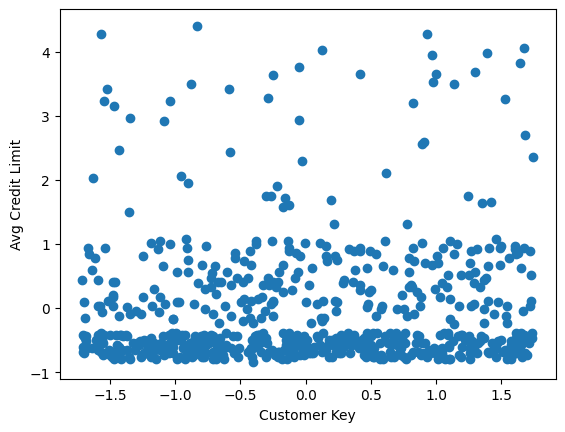

In [84]:
plt.scatter(data['Customer Key'], data['Avg_Credit_Limit'])
plt.xlabel('Customer Key')
plt.ylabel('Avg Credit Limit')
plt.show()

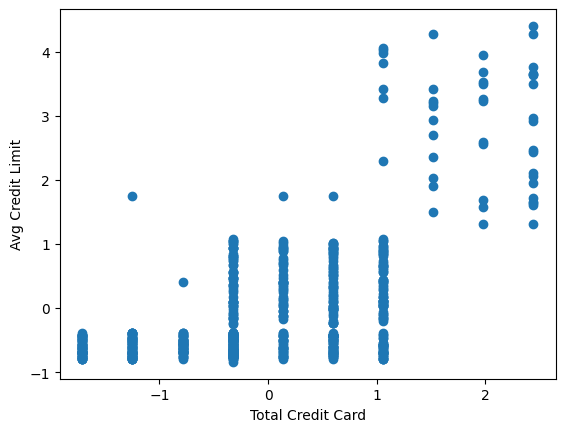

In [85]:
plt.scatter(data['Total_Credit_Cards'], data['Avg_Credit_Limit'])
plt.xlabel('Total Credit Card')
plt.ylabel('Avg Credit Limit')
plt.show()

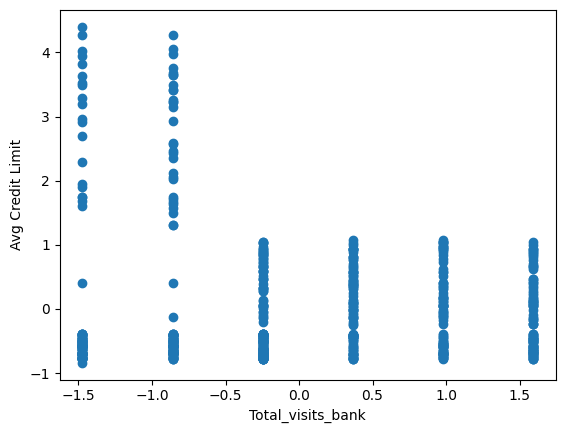

In [86]:
plt.scatter(data['Total_visits_bank'], data['Avg_Credit_Limit'])
plt.xlabel('Total_visits_bank')
plt.ylabel('Avg Credit Limit')
plt.show()

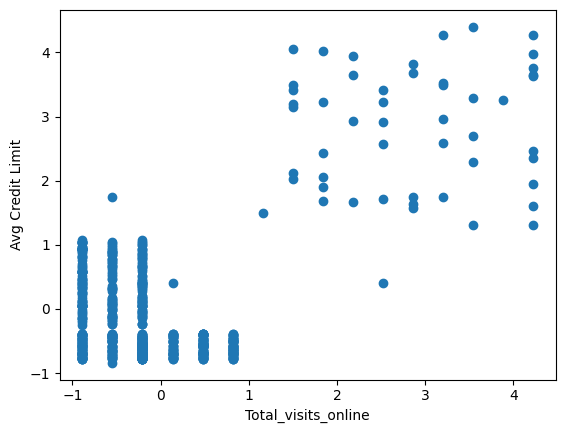

In [87]:
plt.scatter(data['Total_visits_online'], data['Avg_Credit_Limit'])
plt.xlabel('Total_visits_online')
plt.ylabel('Avg Credit Limit')
plt.show()

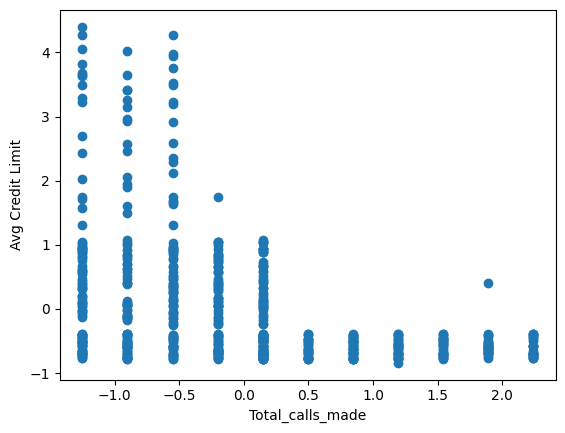

In [88]:
plt.scatter(data['Total_calls_made'], data['Avg_Credit_Limit'])
plt.xlabel('Total_calls_made')
plt.ylabel('Avg Credit Limit')
plt.show()

## Feature selection

In [89]:
data = data.drop(columns=['Sl_No'])

In [90]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

correlation_matrix['Avg_Credit_Limit'].sort_values(ascending=False)

Avg_Credit_Limit       1.000000
Total_Credit_Cards     0.608860
Total_visits_online    0.551385
Customer Key           0.068604
Total_visits_bank     -0.100312
Total_calls_made      -0.414352
Name: Avg_Credit_Limit, dtype: float64

In [91]:
## features to be used are Total_Credit_Cards, Total_visits_online, Customer_key, Total_calls_made

In [16]:
data['Avg_Credit_Limit'].min()

3000

## Linear Regression Model

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = data[['Total_Credit_Cards', 'Customer Key', 'Total_visits_online', 'Total_calls_made']]
y = data['Avg_Credit_Limit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse}, R2 score : {r2}")


MSE : 0.38241671249403353, R2 score : 0.5916420487193148
